In [15]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Projeto 3 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Arthur Henrique Silva Carvalho
## Matrícula: 211026673

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [16]:
def plot_freq_response(x_mag: np.ndarray, x_phase: np.ndarray, name: str) -> None:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), layout='constrained')
    plt.setp(ax[:], xlabel='Frequência angular ($\omega$)')
    plt.setp(ax[0], ylabel='Magnitude')
    plt.setp(ax[1], ylabel='Fase (Graus)')
    ax[0].plot(x_mag)
    plt.setp(ax[0], title=f'Espectro de Magnitude ({name}[$\omega$])')
    ax[1].plot(x_phase)
    plt.setp(ax[1], title=f'Espectro de Fase ({name}[$\omega$])')
    plt.show()



# Questão 1

Considere um sinal $x\left(t\right) = 8 \cdot \text{ret}\left(t\right)$, onde:

$$ \begin{align}
	\text{ret}\left(x\right) = \begin{cases}
                               0 & \text{se} ~~ \left|x\right| > \frac{1}{2} \\
															 \frac{1}{2} & \text{se} ~~ \left|x\right| = \frac{1}{2} \\
															 1 & \text{se} ~~ \left|x\right| < \frac{1}{2} \\
                             \end{cases}
\end{align}                             
$$

Considere que o sinal será amostrado a uma taxa $T = \frac{1}{8}$ s, e que queremos uma resolução na frequência de $f_0 = \frac{1}{4}$ Hz. 



## Questão 1a (1.0 ponto)

Obtenha o sinal $x\left[n\right]$, como uma amostragem de $x\left(t\right)$ .

Para uma frequência de $\frac{1}{4}$ $Hz$, amostramos $x(t)$ de $0$ a $4$ com $\frac{4-0}{\frac{1}{8}} = 32$ amostras.

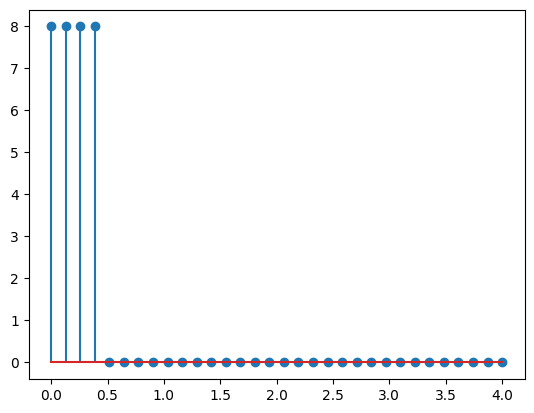

In [17]:
def ret(n: int) -> float:
    if n > 0.5:
        return 0
    if n == 0.5:
        return 0.5
    return 1


nsamples = 32
n = np.linspace(0, 4, nsamples)
x_n = 8*np.array([ret(i) for i in n])
plt.stem(n, x_n)
plt.show()

## Questão 1b (1.0 ponto)

Compare a transformada de Fourier real do sinal $x\left(t\right)$ com a Transformada Discreta de Fourier obtida a partir de $x\left[n\right]$ . 

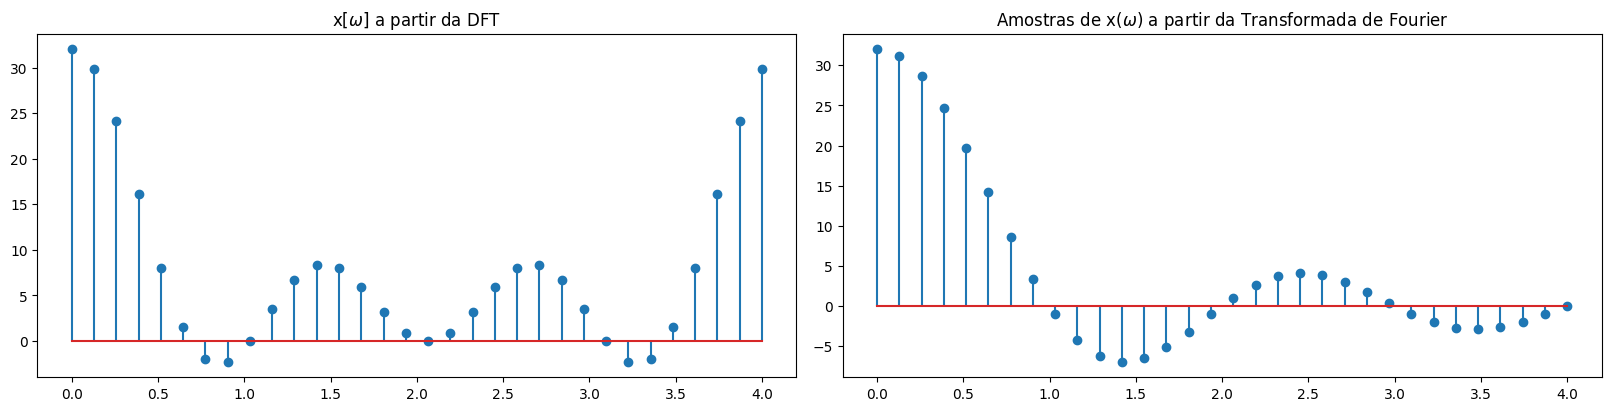

In [18]:
def dft(x: np.ndarray) -> np.ndarray:
    length = len(x)
    w_k = 2*np.pi/length
    response = np.zeros(length, dtype=complex)
    for i in range(length):
        for j in range(length):
            response[i] += x[j] * np.exp(-1j * i * j * w_k)
    return response


x_w_1 = np.real(dft(x_n))
x_w_2 = 32 * np.sinc(n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), layout='constrained')
ax[0].stem(n, x_w_1)
plt.setp(ax[0], title='x[$\omega$] a partir da DFT')
ax[1].stem(n, x_w_2)
plt.setp(ax[1], title='Amostras de x($\omega$) a partir da Transformada de Fourier')
plt.show()


Comparando-se os gráficos, obtivemos uma aparência razoavelmente similar a um $sinc$, que é a Transformada de Fourier da função $ret$. Observamos, no entanto, a presença de aliasing no gráfico obtido a partir da DFT, o que é esperado uma vez que a função $sinc$ é uma função com suporte infinito.

# Questão 2

Considere um sinal $x\left[n\right]$ com $N = 256$ amostras, onde: 
$$
\begin{align}
	x\left[n\right] = \begin{cases}
                               1 & \text{se} ~~ n < 64 \\
															 0 & \text{se} ~~ n \geq 64 \\															 
                             \end{cases}
\end{align}
$$

Considere agora um filtro passa-baixas ideal $H_1$ com frequência de corte normalizada igual a $\frac{1}{16}$.

## Questão 2a (1.0  ponto)

Filtre o sinal $x\left[n\right]$ com o filtro $H_1$, obtendo o sinal $y\left[n\right]$. Compare o sinal original $x\left[n\right]$ com o sinal obtido $y\left[n\right]$. 

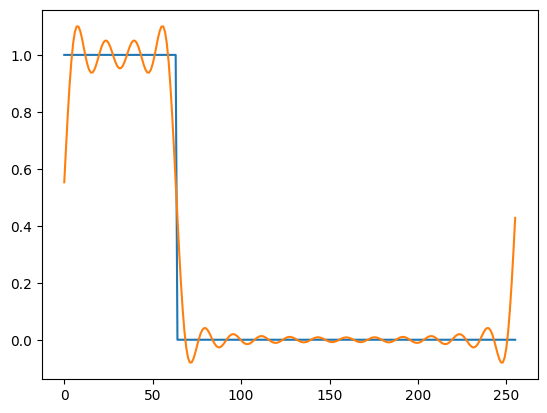

In [19]:
def x(n: int) -> int:
    return n < 64


def h(x: np.ndarray, f_o: float) -> int:
    length = len(x)
    response = np.zeros(length, dtype=complex)
    for i in range(length):
        if i <= f_o or i >= length-f_o:
            response[i] = x[i]
    return response


def idft(x: np.ndarray) -> np.ndarray:
    length = len(x)
    w_k = 2*np.pi/length
    response = np.zeros(length, dtype=complex)
    for i in range(length):
        for j in range(length):
            response[i] += x[j] * np.exp(1j * w_k * i * j)
    return (1/length) * response


nsamples = 256
n = np.linspace(0, 256, nsamples)
x_n = x(n) #x[n]
x_w = dft(x_n) # x[w]
f_o = nsamples * (1/16) # Frequência de corte
y_w = h(x_w, f_o) # y[w]
y_n = idft(y_w) # y[n]

plt.plot(x_n)
plt.plot(np.real(y_n))
plt.show()


Através da comparação entre os sinais $x[n]$ em azul, e $y[n]$ em laranja, concluímos que há um certo grau de similaridade entre eles.

## Questão 2b (1.0 ponto)

Compare o espectro do sinal $x\left[n\right]$ com o espectro do sinal $y\left[n\right]$. 

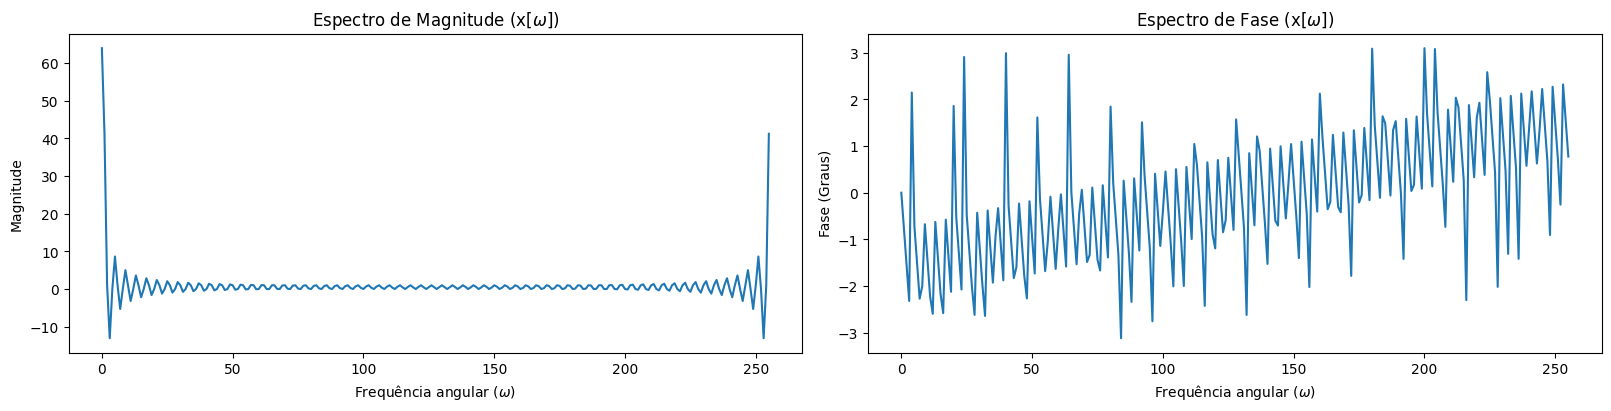

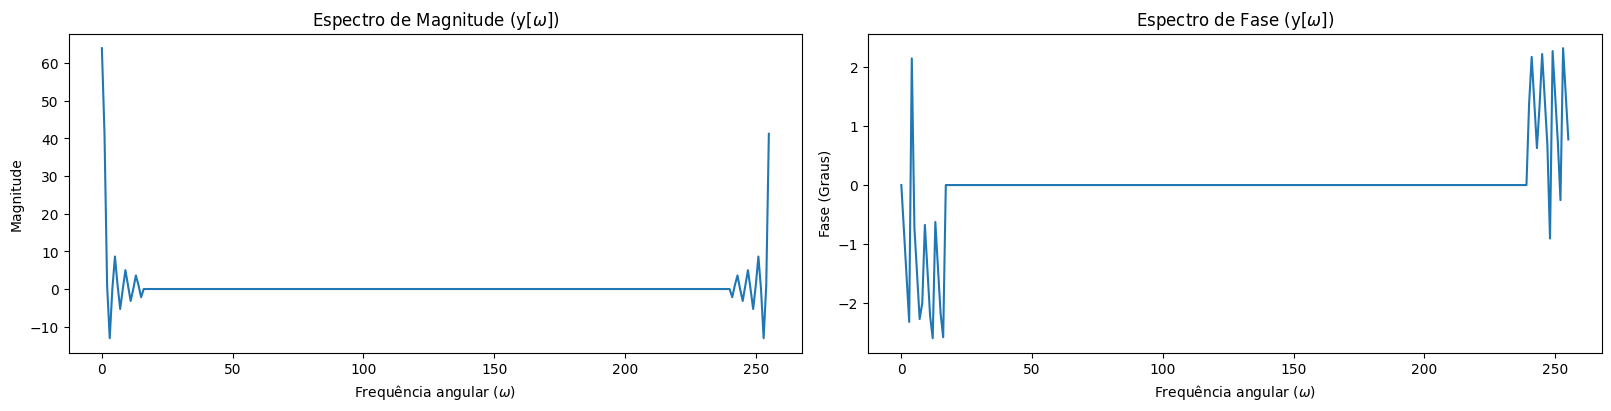

In [20]:
x_mag = np.real(x_w)
x_phase = np.angle(x_w)
y_mag = np.real(y_w)
y_phase = np.angle(y_w)
plot_freq_response(x_mag, x_phase, 'x')
plot_freq_response(y_mag, y_phase, 'y')



## Questão 2c (1.0  ponto)

Aplique o filtro $H_1$ no sinal contido no arquivo "noisy_ecg2.mat". Plote o sinal original e o sinal filtrado, bem como seus espectros.


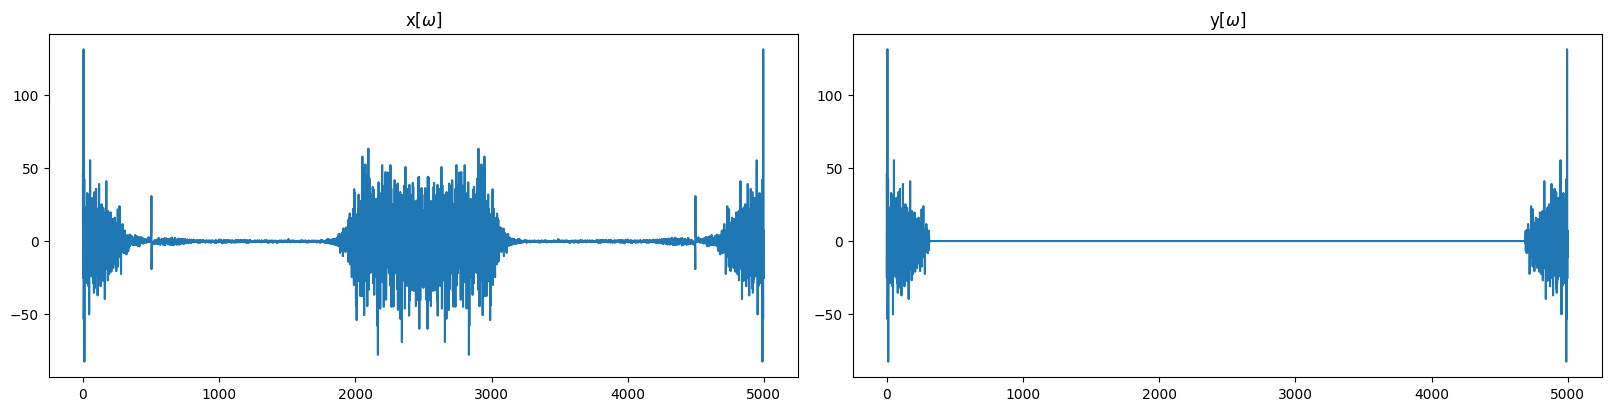

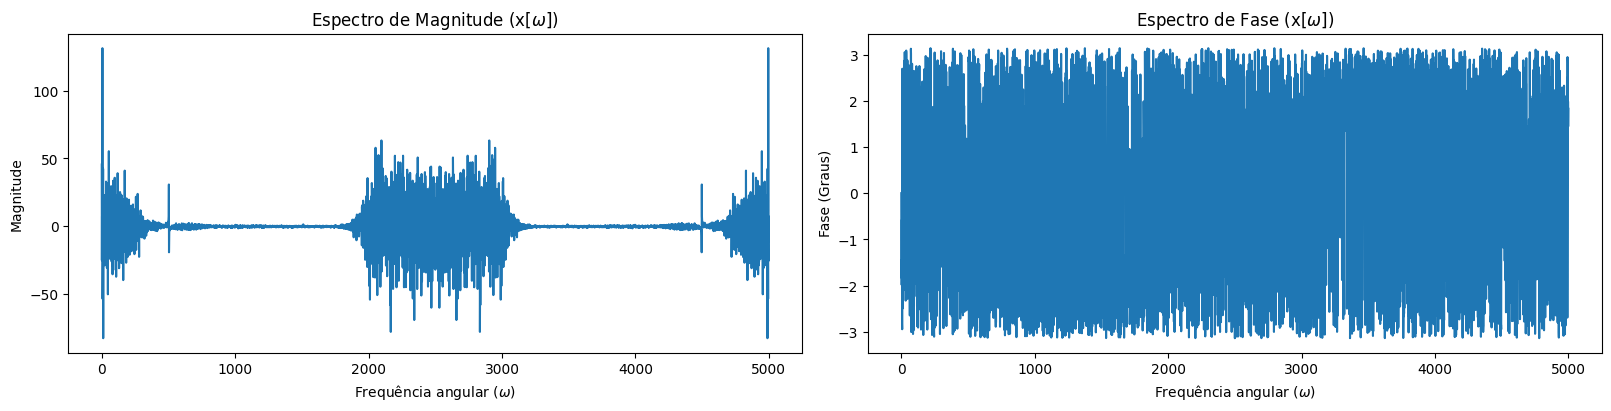

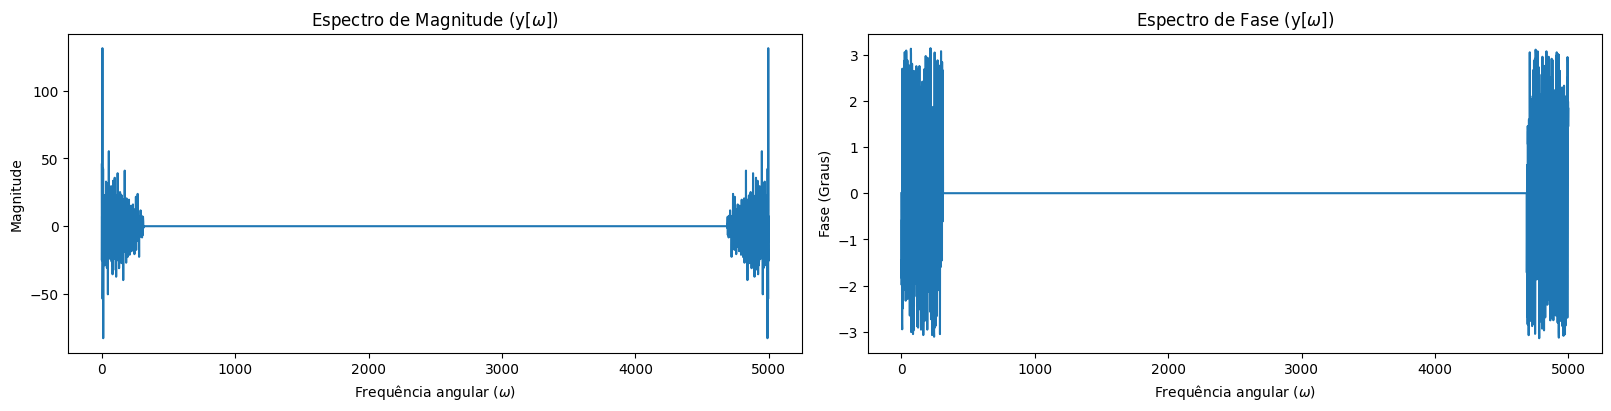

In [21]:
signal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()
x_w = sp.fftpack.fft(signal) # Fast Fourier Transform do módulo scipy
f_o = len(signal) * (1/16) # Frequência de corte
y_w = h(x_w, f_o)
# Espectros de Magnitude e Fase de x[w] e y[w]
x_mag = np.real(x_w)
x_phase = np.angle(x_w)
y_mag = np.real(y_w)
y_phase = np.angle(y_w)
# Plotar x[w], y[w] e seus espectros
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), layout='constrained')
ax[0].plot(np.real(x_w))
plt.setp(ax[0], title='x[$\omega$]')
ax[1].plot(np.real(y_w))
plt.setp(ax[1], title='y[$\omega$]')
plt.show()
plot_freq_response(x_mag, x_phase, 'x')
plot_freq_response(y_mag, y_phase, 'y')


# Questão 3 (5.0 pontos)

O teclado de um touch-fone usa sinais de diferentes frequências para especificar quais botões foram pressionados. O teclado tem 12 botões, em um arranjo de quatro linhas e três colunas. Quando um botão é pressionado um sinal é gerado pela soma de dois tons senoidais com frequências diferentes. A frequência mais alta indica a coluna da tecla pressionada, enquanto a menor frequência indica a linha da tecla pressionada. As frequências são geradas de acordo com a tabela:

| | | Coluna | |
| :-: | :-: | :-: | :-: |
| Linha | 1209 Hz | 1336 Hz | 1477 Hz |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 940 Hz | | 0 | |

A frequência de amostragem é de 8192 Hz, e o som de cada tecla dura um segundo. Escreva um programa que decodifique, de forma automática, um sinal composto por um número de telefone gerado com essas características. Teste o seu programa com os sinais encontrados no arquivo "touch_fone.mat".


In [22]:
lines = {697: 0, 770: 1, 852: 2, 940: 3}
cols = {1209: 0, 1336: 1, 1477: 2}
frequencies = [697, 770, 852, 940, 1209, 1336, 1477]
matrix = [
    ['1', '2', '3'],
    ['4', '5', '6'],
    ['7', '8', '9'],
    ['*', '0', '#']]


def custom_dft(signal: np.ndarray) -> np.ndarray:
    length = len(signal)
    w_k = 2*np.pi / length
    response = np.zeros(length, dtype=complex)
    for i in frequencies:
        for j in range(length):
            response[i] += signal[j] * np.exp(-1j * i * j * w_k)
    return response


def get_num(signal: np.ndarray) -> str:
    length = len(signal)
    nsamples = 8192
    phone_num = []
    for i in range(0, length, nsamples):
        digit = signal[i : i+nsamples]
        decoded = custom_dft(digit)
        line = [lines[j] for j in lines if abs(decoded[j]) > 1][0]
        col = [cols[j] for j in cols if abs(decoded[j]) > 1][0]
        phone_num.append(matrix[line][col])
    return ''.join(phone_num)


signal_x = sp.io.loadmat('touch_fone.mat')['x'].ravel()
signal_y = sp.io.loadmat('touch_fone.mat')['y'].ravel()
signal_z = sp.io.loadmat('touch_fone.mat')['z'].ravel()
print('Telefone decodificado 1:', get_num(signal_x))
print('Telefone decodificado 2:', get_num(signal_y))
print('Telefone decodificado 3:', get_num(signal_z))




Telefone decodificado 1: 31075580
Telefone decodificado 2: 911
Telefone decodificado 3: 2446712
